In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/orginal_데이터_합본.csv',encoding='cp949',index_col=0)
data.head()

,역사명,동별,호선,환승,역위도,역경도,일평균승차,일평균하차,일평균승하차,순위,...,상가 갯수,사용중인 상가,비어있는 상가,구군별,소계,1인가구수,업장 수,계,1인,2인
0,다대포해수욕장,다대1동,1.0,NaN,35.048670,128.964100,4264.0,3497.0,7761.0,69.0,...,2.0,2.0,0.0,사하구,16941.0,6298.0,345.0,16897.0,6277.0,4362.0
1,다대포항,다대1동,1.0,NaN,35.057820,128.971300,2900.0,3321.0,6221.0,80.0,...,1.0,1.0,0.0,사하구,16941.0,6298.0,345.0,16897.0,6277.0,4362.0
2,낫개,다대2동,1.0,NaN,35.065265,128.979873,4104.0,4223.0,8327.0,64.0,...,1.0,1.0,0.0,사하구,12110.0,4651.0,246.0,12072.0,4633.0,3170.0
3,신장림,장림2동,1.0,NaN,35.074433,128.977041,2777.0,2583.0,5360.0,91.0,...,1.0,1.0,0.0,사하구,11905.0,4165.0,302.0,11881.0,4160.0,3230.0
4,장림,장림2동,1.0,NaN,35.081090,128.977500,2854.0,2636.0,5490.0,89.0,...,1.0,1.0,0.0,사하구,11905.0,4165.0,302.0,11881.0,4160.0,3230.0


In [3]:
use_data = pd.DataFrame(columns=['역사명','일평균승하차','전체가구수','1인','2인','업장수'])
use_data

,역사명,일평균승하차,전체가구수,1인,2인,업장수


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
data.columns

Index(['역사명', '동별', '호선', '환승', '역위도', '역경도', '일평균승차', '일평균하차', '일평균승하차', '순위',
       '하행 대기시간', '상행 대기시간', '상가 갯수', '사용중인 상가', '비어있는 상가', '구군별', '소계',
       '1인가구수', '업장 수'],
      dtype='object')

In [6]:
use_data = data[['역사명','일평균승하차','계','1인','2인','업장 수']]
use_data.head()

,역사명,일평균승하차,계,1인,2인,업장 수
0,다대포해수욕장,7761.0,16897.0,6277.0,4362.0,345.0
1,다대포항,6221.0,16897.0,6277.0,4362.0,345.0
2,낫개,8327.0,12072.0,4633.0,3170.0,246.0
3,신장림,5360.0,11881.0,4160.0,3230.0,302.0
4,장림,5490.0,11881.0,4160.0,3230.0,302.0


In [7]:
use_data.rename(columns={'계':'전체인구수','업장 수':'업장수','1인':'1인 가구수','2인':'2인 가구수'},inplace=True)
use_data.head()

C:\Users\0\AppData\Local\Temp\ipykernel_20996\1618543708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data.rename(columns={'계':'전체인구수','업장 수':'업장수','1인':'1인 가구수','2인':'2인 가구수'},inplace=True)


,역사명,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수
0,다대포해수욕장,7761.0,16897.0,6277.0,4362.0,345.0
1,다대포항,6221.0,16897.0,6277.0,4362.0,345.0
2,낫개,8327.0,12072.0,4633.0,3170.0,246.0
3,신장림,5360.0,11881.0,4160.0,3230.0,302.0
4,장림,5490.0,11881.0,4160.0,3230.0,302.0


In [8]:
use_data.columns

Index(['역사명', '일평균승하차', '전체인구수', '1인 가구수', '2인 가구수', '업장수'], dtype='object')

In [14]:
use_data_array = use_data[['일평균승하차', '전체인구수', '1인 가구수', '2인 가구수', '업장수']].fillna(0).to_numpy()

In [15]:
scaler = MinMaxScaler()

scaler.fit(use_data_array)

MinMaxScaler()

In [16]:
print(scaler.data_max_)

[57826. 17962.  8065.  4817.  1642.]


In [17]:
use_data_array = scaler.transform(use_data_array)
use_data_array

array([[0.13421298, 0.94070816, 0.7783013 , 0.90554287, 0.21010962],
       [0.10758136, 0.94070816, 0.7783013 , 0.90554287, 0.21010962],
       [0.14400097, 0.67208551, 0.57445753, 0.65808595, 0.1498173 ],
       [0.09269187, 0.66145195, 0.51580905, 0.67054183, 0.18392205],
       [0.09493999, 0.66145195, 0.51580905, 0.67054183, 0.18392205],
       [0.11375506, 0.45484913, 0.45790453, 0.43346481, 0.13520097],
       [0.19565593, 0.42356085, 0.3016739 , 0.4452979 , 0.10779537],
       [0.50288797, 0.58790781, 0.60582765, 0.52833714, 0.22777101],
       [0.18899803, 0.63266897, 0.46807192, 0.68798007, 0.25091352],
       [0.12176184, 0.30447612, 0.25096094, 0.32800498, 0.11266748],
       [0.26408536, 0.4811825 , 0.38536888, 0.54141582, 0.14250914],
       [0.1087746 , 0.39071373, 0.30898946, 0.41955574, 0.09378806],
       [0.09125653, 0.36755372, 0.31642901, 0.33880008, 0.0998782 ],
       [0.18325667, 0.36755372, 0.31642901, 0.33880008, 0.0998782 ],
       [0.23944247, 0.3086516 , 0.

In [18]:
use_data_array.shape

(122, 5)

In [20]:
scaler.transform([[2,2,2,2,2]])

array([[3.45865182e-05, 1.11346175e-04, 2.47985121e-04, 4.15196180e-04,
        1.21802680e-03]])

In [15]:
['일평균승하차', '전체인구수', '1인가구수', '업장수']

['일평균승하차', '전체인구수', '1인가구수', '업장수']

In [21]:
scaling_data = pd.DataFrame(use_data_array,columns=['일평균승하차', '전체인구수', '1인 가구수', '2인 가구수', '업장수'],index=list(use_data.역사명))
scaling_data.head()

,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수
다대포해수욕장,0.134213,0.940708,0.778301,0.905543,0.210110
다대포항,0.107581,0.940708,0.778301,0.905543,0.210110
낫개,0.144001,0.672086,0.574458,0.658086,0.149817
신장림,0.092692,0.661452,0.515809,0.670542,0.183922
장림,0.094940,0.661452,0.515809,0.670542,0.183922


In [22]:
scaling_data.corr()

,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수
일평균승하차,1.000000,-0.004430,0.148559,-0.138489,0.637238
전체인구수,-0.004430,1.000000,0.865727,0.965859,0.180285
1인 가구수,0.148559,0.865727,1.000000,0.743867,0.215431
2인 가구수,-0.138489,0.965859,0.743867,1.000000,0.085578
업장수,0.637238,0.180285,0.215431,0.085578,1.000000


In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

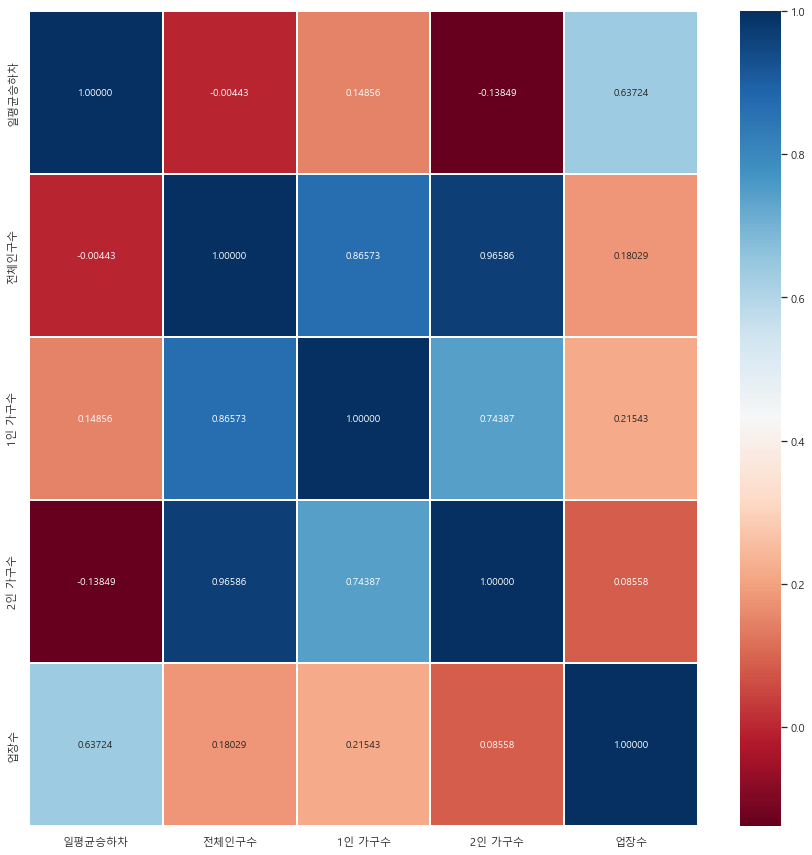

In [25]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(scaling_data.corr(), annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

In [26]:
data.columns

Index(['역사명', '동별', '호선', '환승', '역위도', '역경도', '일평균승차', '일평균하차', '일평균승하차', '순위',
       '하행 대기시간', '상행 대기시간', '상가 갯수', '사용중인 상가', '비어있는 상가', '구군별', '소계',
       '1인가구수', '업장 수', '계', '1인', '2인'],
      dtype='object')

In [ ]:
#['역사명', '동별', '일평균승하차', '상가 갯수', '사용중인 상가', '비어있는 상가', '업장 수', '계', '1인', '2인']

In [30]:
all_data_col = ['일평균승하차', '상가 갯수', '사용중인 상가', '비어있는 상가', '업장 수', '계', '1인', '2인']

In [31]:
all_data = data[all_data_col].fillna(0).to_numpy()
all_data

array([[7.7610e+03, 2.0000e+00, 2.0000e+00, 0.0000e+00, 3.4500e+02,
        1.6897e+04, 6.2770e+03, 4.3620e+03],
       [6.2210e+03, 1.0000e+00, 1.0000e+00, 0.0000e+00, 3.4500e+02,
        1.6897e+04, 6.2770e+03, 4.3620e+03],
       [8.3270e+03, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.4600e+02,
        1.2072e+04, 4.6330e+03, 3.1700e+03],
       [5.3600e+03, 1.0000e+00, 1.0000e+00, 0.0000e+00, 3.0200e+02,
        1.1881e+04, 4.1600e+03, 3.2300e+03],
       [5.4900e+03, 1.0000e+00, 1.0000e+00, 0.0000e+00, 3.0200e+02,
        1.1881e+04, 4.1600e+03, 3.2300e+03],
       [6.5780e+03, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.2200e+02,
        8.1700e+03, 3.6930e+03, 2.0880e+03],
       [1.1314e+04, 9.0000e+00, 6.0000e+00, 3.0000e+00, 1.7700e+02,
        7.6080e+03, 2.4330e+03, 2.1450e+03],
       [2.9080e+04, 1.0000e+01, 1.0000e+01, 0.0000e+00, 3.7400e+02,
        1.0560e+04, 4.8860e+03, 2.5450e+03],
       [1.0929e+04, 4.0000e+00, 2.0000e+00, 2.0000e+00, 4.1200e+02,
        1.1364e+04, 3.7750e+

In [32]:
scaler_2 = MinMaxScaler()

scaler_2.fit(all_data)

MinMaxScaler()

In [33]:
all_data = scaler_2.transform(all_data)

In [34]:
all_data_scaling = pd.DataFrame(all_data,columns=all_data_col)

In [35]:
all_data_scaling.head()

,일평균승하차,상가 갯수,사용중인 상가,비어있는 상가,업장 수,계,1인,2인
0,0.134213,0.057143,0.083333,0.0,0.210110,0.940708,0.778301,0.905543
1,0.107581,0.028571,0.041667,0.0,0.210110,0.940708,0.778301,0.905543
2,0.144001,0.028571,0.041667,0.0,0.149817,0.672086,0.574458,0.658086
3,0.092692,0.028571,0.041667,0.0,0.183922,0.661452,0.515809,0.670542
4,0.094940,0.028571,0.041667,0.0,0.183922,0.661452,0.515809,0.670542


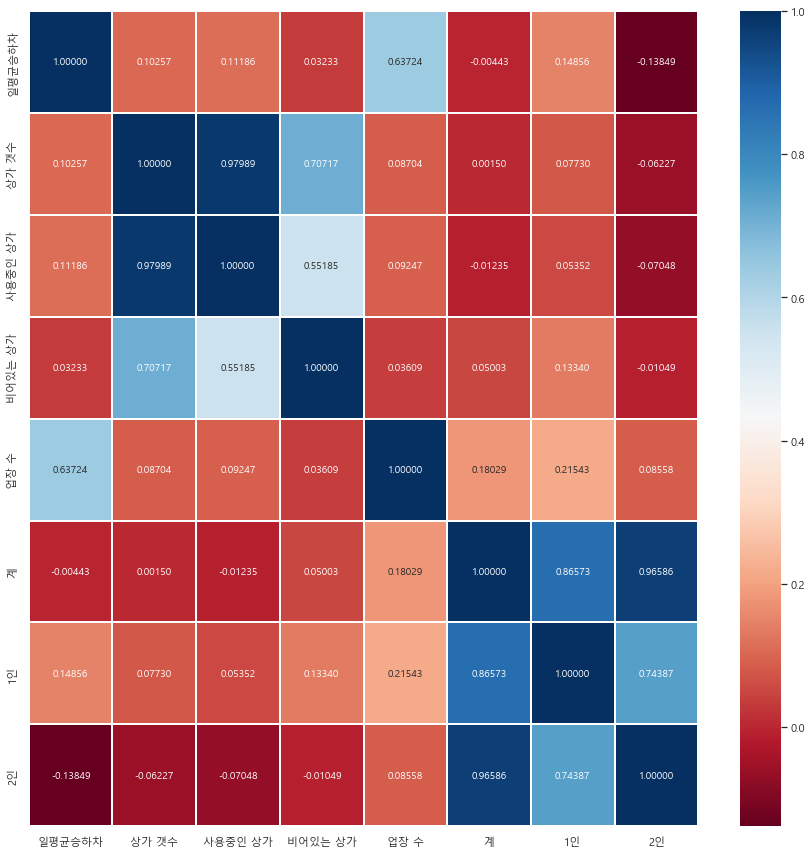

In [36]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(all_data_scaling.corr(), annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

In [37]:
scaling_data.head()

,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수
다대포해수욕장,0.134213,0.940708,0.778301,0.905543,0.210110
다대포항,0.107581,0.940708,0.778301,0.905543,0.210110
낫개,0.144001,0.672086,0.574458,0.658086,0.149817
신장림,0.092692,0.661452,0.515809,0.670542,0.183922
장림,0.094940,0.661452,0.515809,0.670542,0.183922


In [38]:
scaling_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 다대포해수욕장 to 안평
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일평균승하차  122 non-null    float64
 1   전체인구수   122 non-null    float64
 2   1인 가구수  122 non-null    float64
 3   2인 가구수  122 non-null    float64
 4   업장수     122 non-null    float64
dtypes: float64(5)
memory usage: 5.7+ KB


In [39]:
scaling_data.columns

Index(['일평균승하차', '전체인구수', '1인 가구수', '2인 가구수', '업장수'], dtype='object')

In [40]:
sum(list(scaling_data.iloc[0]))

2.9688749387927524

In [41]:
scaling_data

,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수
다대포해수욕장,0.134213,0.940708,0.778301,0.905543,0.210110
다대포항,0.107581,0.940708,0.778301,0.905543,0.210110
낫개,0.144001,0.672086,0.574458,0.658086,0.149817
신장림,0.092692,0.661452,0.515809,0.670542,0.183922
장림,0.094940,0.661452,0.515809,0.670542,0.183922
...,...,...,...,...,...
석대,0.005983,0.430075,0.532548,0.419763,0.096833
영산대,0.082938,0.430075,0.532548,0.419763,0.096833
동부산대학,0.074707,0.661285,0.710725,0.669089,0.133374
고촌,0.017570,0.000000,0.000000,0.000000,0.000000


In [42]:
scaling_data

,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수
다대포해수욕장,0.134213,0.940708,0.778301,0.905543,0.210110
다대포항,0.107581,0.940708,0.778301,0.905543,0.210110
낫개,0.144001,0.672086,0.574458,0.658086,0.149817
신장림,0.092692,0.661452,0.515809,0.670542,0.183922
장림,0.094940,0.661452,0.515809,0.670542,0.183922
...,...,...,...,...,...
석대,0.005983,0.430075,0.532548,0.419763,0.096833
영산대,0.082938,0.430075,0.532548,0.419763,0.096833
동부산대학,0.074707,0.661285,0.710725,0.669089,0.133374
고촌,0.017570,0.000000,0.000000,0.000000,0.000000


In [43]:
new_col = {'등급분류':[]}

for idx in range(len(scaling_data)):
    new_col['등급분류'].append(sum(list(scaling_data.iloc[idx])))

In [45]:
print((new_col['등급분류']))

[2.9688749387927524, 2.9422433197978366, 2.198447256422967, 2.1244167515920385, 2.1266648752734274, 1.5951744964844294, 1.473983958325461, 2.452731580236055, 2.228632502755271, 1.117871356863405, 1.8145616879508735, 1.3218215927014083, 1.2139175473535895, 1.3059176856996622, 1.3095212622441612, 0.8339254398168889, 0.8479329796778512, 1.170307118182477, 1.113832438385256, 1.3651243016940933, 1.1741208021972254, 1.1486341513317142, 2.169785701713301, 2.1733594490346353, 3.109694650336613, 2.778511445549839, 2.9147740178940365, 1.850266409395848, 1.913882501036225, 2.132940853227806, 1.8694607577690157, 2.170506061255271, 2.1820346051242154, 1.7536978707832618, 2.5600630948953396, 2.70990918488946, 2.462777035257073, 2.350678936778186, 1.6597485230984492, 2.418221472446571, 2.72852727023972, 1.0091251265512784, 1.1231395837158755, 1.834790031364959, 2.3830460247794614, 2.2961999417836476, 2.1666907244765534, 2.9112208898109384, 3.16327014101282, 2.515610583792773, 1.601963327248136, 2.137

In [46]:
scaling_data['등급분류'] = new_col['등급분류']
scaling_data.head()

,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수,등급분류
다대포해수욕장,0.134213,0.940708,0.778301,0.905543,0.210110,2.968875
다대포항,0.107581,0.940708,0.778301,0.905543,0.210110,2.942243
낫개,0.144001,0.672086,0.574458,0.658086,0.149817,2.198447
신장림,0.092692,0.661452,0.515809,0.670542,0.183922,2.124417
장림,0.094940,0.661452,0.515809,0.670542,0.183922,2.126665


In [47]:
use_data.head()

,역사명,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수
0,다대포해수욕장,7761.0,16897.0,6277.0,4362.0,345.0
1,다대포항,6221.0,16897.0,6277.0,4362.0,345.0
2,낫개,8327.0,12072.0,4633.0,3170.0,246.0
3,신장림,5360.0,11881.0,4160.0,3230.0,302.0
4,장림,5490.0,11881.0,4160.0,3230.0,302.0


In [53]:
org_data = pd.read_csv('../data/orginal_데이터_합본.csv',encoding='cp949',index_col=0)

In [54]:
org_data.head()

,역사명,동별,호선,환승,역위도,역경도,일평균승차,일평균하차,일평균승하차,순위,...,상가 갯수,사용중인 상가,비어있는 상가,구군별,소계,1인가구수,업장 수,계,1인,2인
0,다대포해수욕장,다대1동,1.0,NaN,35.048670,128.964100,4264.0,3497.0,7761.0,69.0,...,2.0,2.0,0.0,사하구,16941.0,6298.0,345.0,16897.0,6277.0,4362.0
1,다대포항,다대1동,1.0,NaN,35.057820,128.971300,2900.0,3321.0,6221.0,80.0,...,1.0,1.0,0.0,사하구,16941.0,6298.0,345.0,16897.0,6277.0,4362.0
2,낫개,다대2동,1.0,NaN,35.065265,128.979873,4104.0,4223.0,8327.0,64.0,...,1.0,1.0,0.0,사하구,12110.0,4651.0,246.0,12072.0,4633.0,3170.0
3,신장림,장림2동,1.0,NaN,35.074433,128.977041,2777.0,2583.0,5360.0,91.0,...,1.0,1.0,0.0,사하구,11905.0,4165.0,302.0,11881.0,4160.0,3230.0
4,장림,장림2동,1.0,NaN,35.081090,128.977500,2854.0,2636.0,5490.0,89.0,...,1.0,1.0,0.0,사하구,11905.0,4165.0,302.0,11881.0,4160.0,3230.0


In [50]:
org_data.columns

Index(['역사명', '동별', '호선', '환승', '역위도', '역경도', '일평균승차', '일평균하차', '일평균승하차', '순위',
       '하행 대기시간', '상행 대기시간', '상가 갯수', '사용중인 상가', '비어있는 상가', '구군별', '소계',
       '1인가구수', '업장 수', '계', '1인', '2인'],
      dtype='object')

In [ ]:
all_data_col = ['일평균승하차', '상가 갯수', '사용중인 상가', '비어있는 상가', '업장 수', '계', '1인', '2인']

In [55]:
org_data = org_data[['역사명', '동별', '역위도', '역경도','일평균승하차', '상가 갯수', '사용중인 상가', '비어있는 상가', '업장 수', '계', '1인', '2인']]

org_data.head()

,역사명,동별,역위도,역경도,일평균승하차,상가 갯수,사용중인 상가,비어있는 상가,업장 수,계,1인,2인
0,다대포해수욕장,다대1동,35.048670,128.964100,7761.0,2.0,2.0,0.0,345.0,16897.0,6277.0,4362.0
1,다대포항,다대1동,35.057820,128.971300,6221.0,1.0,1.0,0.0,345.0,16897.0,6277.0,4362.0
2,낫개,다대2동,35.065265,128.979873,8327.0,1.0,1.0,0.0,246.0,12072.0,4633.0,3170.0
3,신장림,장림2동,35.074433,128.977041,5360.0,1.0,1.0,0.0,302.0,11881.0,4160.0,3230.0
4,장림,장림2동,35.081090,128.977500,5490.0,1.0,1.0,0.0,302.0,11881.0,4160.0,3230.0


In [56]:
org_data.rename(columns={'계':'전체가구수','업장 수':'업장수','1인':'1인 가구수','2인':'2인 가구수'},inplace=True)
org_data.head()

,역사명,동별,역위도,역경도,일평균승하차,상가 갯수,사용중인 상가,비어있는 상가,업장수,전체가구수,1인 가구수,2인 가구수
0,다대포해수욕장,다대1동,35.048670,128.964100,7761.0,2.0,2.0,0.0,345.0,16897.0,6277.0,4362.0
1,다대포항,다대1동,35.057820,128.971300,6221.0,1.0,1.0,0.0,345.0,16897.0,6277.0,4362.0
2,낫개,다대2동,35.065265,128.979873,8327.0,1.0,1.0,0.0,246.0,12072.0,4633.0,3170.0
3,신장림,장림2동,35.074433,128.977041,5360.0,1.0,1.0,0.0,302.0,11881.0,4160.0,3230.0
4,장림,장림2동,35.081090,128.977500,5490.0,1.0,1.0,0.0,302.0,11881.0,4160.0,3230.0


In [57]:
org_data.to_csv('../data/통합_사용_데이터.csv',encoding='cp949')

In [58]:
org_data.fillna(0,inplace=True)
org_data[org_data['상가 갯수'] != 0]

,역사명,동별,역위도,역경도,일평균승하차,상가 갯수,사용중인 상가,비어있는 상가,업장수,전체가구수,1인 가구수,2인 가구수
0,다대포해수욕장,다대1동,35.048670,128.964100,7761.0,2.0,2.0,0.0,345.0,16897.0,6277.0,4362.0
1,다대포항,다대1동,35.057820,128.971300,6221.0,1.0,1.0,0.0,345.0,16897.0,6277.0,4362.0
2,낫개,다대2동,35.065265,128.979873,8327.0,1.0,1.0,0.0,246.0,12072.0,4633.0,3170.0
3,신장림,장림2동,35.074433,128.977041,5360.0,1.0,1.0,0.0,302.0,11881.0,4160.0,3230.0
4,장림,장림2동,35.081090,128.977500,5490.0,1.0,1.0,0.0,302.0,11881.0,4160.0,3230.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,서동,서2동,35.213333,129.107683,4052.0,1.0,1.0,0.0,102.0,4872.0,2478.0,1309.0
108,반여농산물시장,반송1동,35.217779,129.124061,3738.0,1.0,1.0,0.0,159.0,7725.0,4295.0,2022.0
109,석대,반송1동,35.218112,129.137179,346.0,1.0,0.0,1.0,159.0,7725.0,4295.0,2022.0
110,영산대,반송1동,35.225777,129.146149,4796.0,1.0,1.0,0.0,159.0,7725.0,4295.0,2022.0
